In [1]:
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt
from thermal.animate import AnimateEnthalpy

plt.rcParams['text.usetex'] = True
plt.rcParams['animation.html'] = 'jshtml'


In [2]:
test_fp = '/Volumes/thermal/Thesis/thermal-structure/expr/03_PeriodicSurge/result/crmpt12/gridded/crmpt12_dx_50_TT_6000.0_MB_-0.37_OFF_Tma_-8.5_B_1.000e-03_SP_2_QP_28.zarr'

In [3]:
%%time
vars_ = ['X', 'Z', 'height', 'enthalpy_h', 'percent_temperate',
         'phase change enthalpy', 'water content', 'temperature']

src = xr.open_zarr(test_fp)[vars_]
src = src.sel(t=slice(4.20e3, 5.6e3)).compute()
src = src.interp(t=np.linspace(4.25e3, 5.5e3, 1250))


CPU times: user 5 s, sys: 7.61 s, total: 12.6 s
Wall time: 22.3 s


In [4]:
%%time
Enth_anim = AnimateEnthalpy(src, frames=np.arange(0,1250,5))
plt.close()

CPU times: user 28.6 ms, sys: 5.78 ms, total: 34.4 ms
Wall time: 91.8 ms


In [5]:
%%time
# Enth_anim.ani

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs


In [6]:
%%time
Enth_anim.ani.save('B_1.000e-03_SP_2_QP_28_TT_4.25-5.5ka.mp4', dpi=300)

CPU times: user 7min 52s, sys: 38.7 s, total: 8min 30s
Wall time: 9min 36s


### Reopen the source file in order to plot the timeseries of fraction temperate

In [7]:
src = xr.open_zarr(test_fp)

# interpolate to constant timestep
src = src.interp(t=np.linspace(0.1, 6e3, 60_000))
# smooth with annual rolling window
src = src.rolling(t=10, center=True, min_periods=1).mean('t')

# subset timestep to timeslice corresponding to the animation
sub = src.sel(t=np.linspace(4.25e3, 5.5e3, 12500), method='nearest')

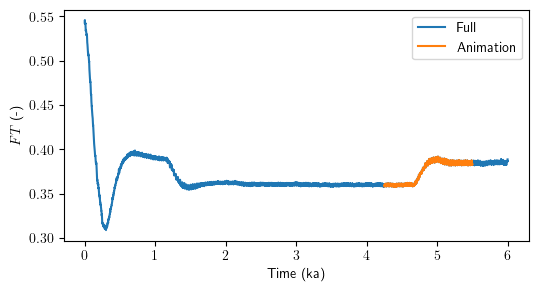

In [14]:
fig, ax = plt.subplots(figsize=(6,3))

ax.plot(src.t/1e3, src.percent_temperate/100, label='Full')
ax.plot(sub.t/1e3, sub.percent_temperate/100, label='Animation')

ax.legend()
ax.set_ylabel('$FT$ (-)')
ax.set_xlabel('Time (ka)');

fig.savefig('B_1.000e-03_SP_2_QP_28_TT_4.25-5.5ka_timeseries.png', dpi=300)